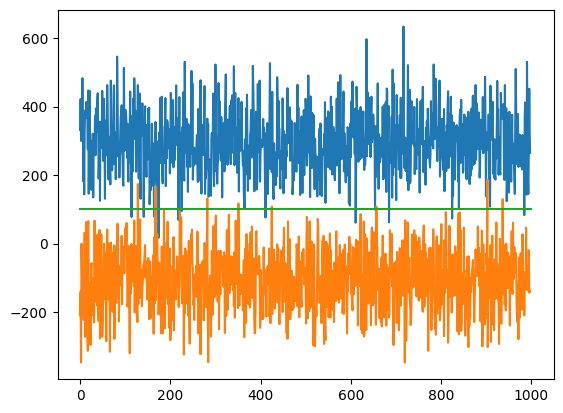

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('classify_ldiff.dat', sep='\t')
df.columns = [0, 1]

plt.plot(df[0])
plt.plot(df[1])
plt.plot([0, 1000], [100, 100])
plt.show()

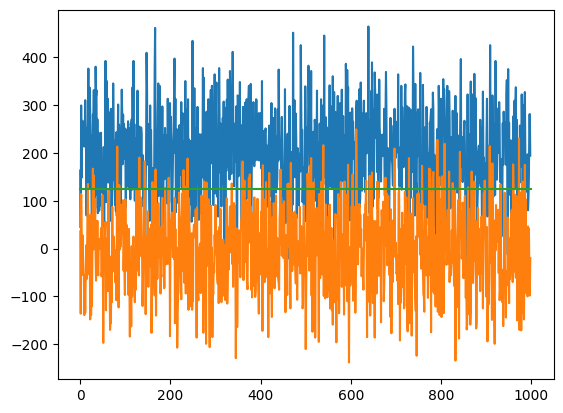

In [31]:
df = pd.read_csv('classify_sdiff.dat', sep='\t')
df.columns = [0, 1]

plt.plot(df[0])
plt.plot(df[1])
plt.plot([0, 1000], [125, 125])
plt.show()

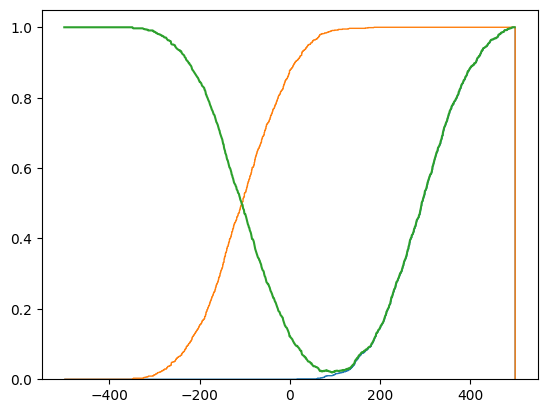

93.5935935935936


In [32]:
import numpy as np

df = pd.read_csv('classify_ldiff.dat', sep='\t')
df.columns = [0, 1]

bins = np.linspace(-500, 500, 1000)
r = plt.hist(df[0], bins=bins, histtype='step', density=True, cumulative=True)
Fjed = r[0]
r = plt.hist(df[1], bins=bins, histtype='step', density=True, cumulative=True)
Fsit = r[0]
plt.plot(bins[:-1], Fjed+1-Fsit)
plt.show()

print(bins[np.argmin(Fjed+1-Fsit)])

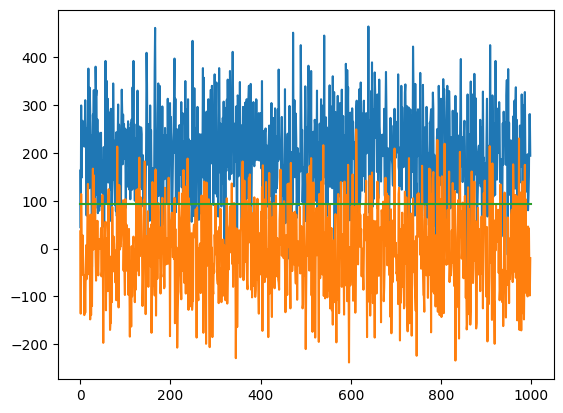

In [33]:
df = pd.read_csv('classify_sdiff.dat', sep='\t')
df.columns = [0, 1]

plt.plot(df[0])
plt.plot(df[1])
plt.plot([0, 1000], [93, 93])
plt.show()

In [34]:
# найти столбец у которого вероятность
# наиболее сильно отличается от полной

f = open('binary_rules.dat')
d = []
for s in f:
  d.append([int(x) for x in s.split()])
d = np.array(d)
X = d[:, :-1]
Y = d[:, -1]
p0 = Y[Y==1].shape[0] / Y.shape[0]
result = []
for i in range(5):
  Y2 = Y[X[:, i] == 1]
  pYX = Y2[Y2 == 1].shape[0] /Y2.shape[0]
  result.append(pYX)

print(result, p0)
t = Y[X[: ,2] == 0]
print(t.mean())

d1 = d[X[: ,2] == 1]

X2 = X[X[: ,2] == 1]
Y2 = Y[X[: ,2] == 1]
result2 = []
p0 = Y2[Y2==1].shape[0] / Y2.shape[0]
for i in range(5):
  Y3 = Y2[X2[:, i] == 1]
  pYX = Y3[Y3 == 1].shape[0] /Y3.shape[0]
  result2.append(pYX)

print(result2, p0)

t = (Y2[X2[: ,3]==1])
print(t.mean())

[0.22964509394572025, 0.2556701030927835, 0.5, 0.4959514170040486, 0.26260504201680673] 0.245
0.0
[0.497737556561086, 0.5166666666666667, 0.5, 1.0, 0.508130081300813] 0.5
1.0


In [35]:
from sklearn.tree import DecisionTreeClassifier

f = open('binary_rules.dat')
d = []
for l in f:
  d.append([float(x) for x in l.split()])
d = np.array(d)

x = d[:, :-1]
y = d[:, -1]
clf = DecisionTreeClassifier()
clf.fit(x, y)

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytreе")

'mytreе.pdf'

In [36]:
print(clf.score(x, y))

1.0


In [37]:
print(1 -(np.var(y - clf.predict(x)) / np.var(y))) #Коэффициент детерминации

1.0


In [38]:
f = open('unknown_data.dat.short')


d = []
for l in f:
  d.append([float(x) for x in l.split()])
d = np.array(d)

x = d[:, :-1]
y = d[:, -1]
clf = DecisionTreeClassifier()
clf.fit(x, y)

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree2")

'mytree2.pdf'

In [51]:
p0 = 37545 / 100000
p1 = 1 - p0
g = p0 * (1 - p0) + p1 * (1 - p1)
g

0.468974595

In [40]:
f = open('test_add.dat.short')


d = []
for l in f:
  d.append([float(x) for x in l.split()])
d = np.array(d)

x = d[:, :-1]
y = d[:, -1]
clf = DecisionTreeClassifier()
clf.fit(x, y)

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree3")
print(clf.score(x, y))

1.0


In [41]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(x, y)
print(clf.score(x, y))

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree3_depth7")

0.95114


'mytree3_depth7.pdf'

In [42]:
clf = DecisionTreeClassifier(min_weight_fraction_leaf=0.01)
clf.fit(x, y)
print(clf.score(x, y))

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree3_obrez")

0.95112


'mytree3_obrez.pdf'

In [43]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(x, y)
print(clf.score(x, y))

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree3_max_leaf_nodes")

0.95053


'mytree3_max_leaf_nodes.pdf'

In [ ]:
import pickle 
s = pickle.dumps(clf) # Сериализация объекта
ff = open('my_first_ai', 'wb')
ff.write(s)
ff.close()


In [ ]:
ff = open('my_first_ai', 'rb') # Десериализация объекта
s2 = ff.read()
ff.close()
clf2 = pickle.loads(s2)
print(clf2.score(x, y))

0.95053


In [46]:
f = open('source.dat')


d = []
for l in f:
  d.append([float(x) for x in l.split()])
d = np.array(d)

x = d[:, :-1]
y = d[:, -1]
clf = DecisionTreeClassifier()
clf.fit(x, y)

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree4")
print(clf.score(x, y))

1.0


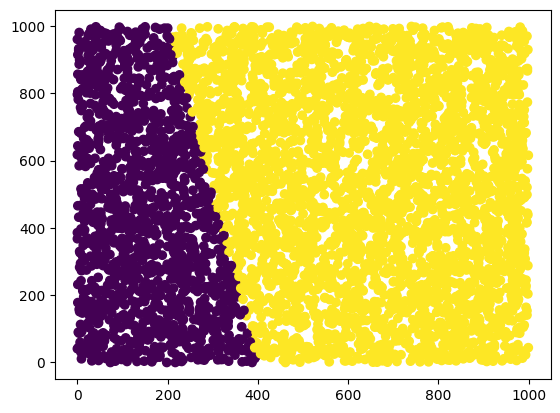

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

f = open('test_add.dat.short')
d = []
for l in f:
    d.append([float(x) for x in l.split()])
f.close()
d = np.array(d)
x = d[:, :-1]
y = d[:, -1]

max_depths = [3, 5, 7, 10, None]
min_weight_fraction_leafs = [0.0, 0.01, 0.05]
max_leaf_nodes_list = [5, 10, 20, None]

results = []
for max_depth in max_depths:
    for min_weight_fraction_leaf in min_weight_fraction_leafs:
        for max_leaf_nodes in max_leaf_nodes_list:
            clf = DecisionTreeClassifier(
                max_depth=max_depth,
                min_weight_fraction_leaf=min_weight_fraction_leaf,
                max_leaf_nodes=max_leaf_nodes
            )
            if max_depth == None and min_weight_fraction_leaf == 0.0 and max_leaf_nodes == None:
                continue
            clf.fit(x, y)
            score = clf.score(x, y)
            results.append((max_depth, min_weight_fraction_leaf, max_leaf_nodes, score))
            print(f"max_depth={max_depth}, min_weight_fraction_leaf={min_weight_fraction_leaf}, max_leaf_nodes={max_leaf_nodes} => score={score:.4f}")

best = max(results, key=lambda x: x[3])
print(f"\nЛучший результат: max_depth={best[0]}, min_weight_fraction_leaf={best[1]}, max_leaf_nodes={best[2]} => score={best[3]:.4f}")

max_depth=3, min_weight_fraction_leaf=0.0, max_leaf_nodes=5 => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.0, max_leaf_nodes=10 => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.0, max_leaf_nodes=20 => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.0, max_leaf_nodes=None => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=5 => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=10 => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=20 => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=None => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.05, max_leaf_nodes=5 => score=0.9434
max_depth=3, min_weight_fraction_leaf=0.05, max_leaf_nodes=10 => score=0.9434
max_depth=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=10 => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=20 => score=0.9486
max_depth=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=None => 